# California Houses Analysis

> We want to annalyze the houses prices on California to identify factors that influence their value


there can be many approaches to view this. we are going to see a few of them. pretty basic someone coud say

---

# Loading the libraires

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# graphics config
sns.set(style="whitegrid")

> Pandas is used for data manipulation

> Matplotlib is for customizable static visualization

> Seaborns is for data visualization


---

# Loading the dataset

In [19]:
housing_data_original = pd.read_csv('housing.csv')

# using a copy of the dataset just in case
housing_data = housing_data_original.copy()


---

# Checking the head

In [36]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,very high,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,very high,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,very high,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,high,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,medium,6.281853


---

# Checking the description

In [21]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


---

# Initial inspection

In [22]:
print('dataset info:')
housing_data.info()

dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


---

# **Data Cleansing**

# Handling null values

In [23]:
# shows the amount of null values before cleansing
print(housing_data.isnull().sum())

# séance
housing_data['total_bedrooms'] = housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].median())

# shows the amount of null values after the cleanse
print(housing_data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


---

# Verify and delete duplicates

> this one is just because



In [24]:
# verifies if there are any duplicated data
print('the amount of dupes are:', housing_data.duplicated().sum())

# in case there are, it purges them
housing_data = housing_data.drop_duplicates()

# shows the confirmation
print('the amount of dupes now are:', housing_data.duplicated().sum())


the amount of dupes are: 0
the amount of dupes now are: 0


---

**Exploratory Data Analysis (EDA)**

# Creating Plots to understand the nature of data

# Houses price distribution


> the *histogram* highlights key trends in house prices



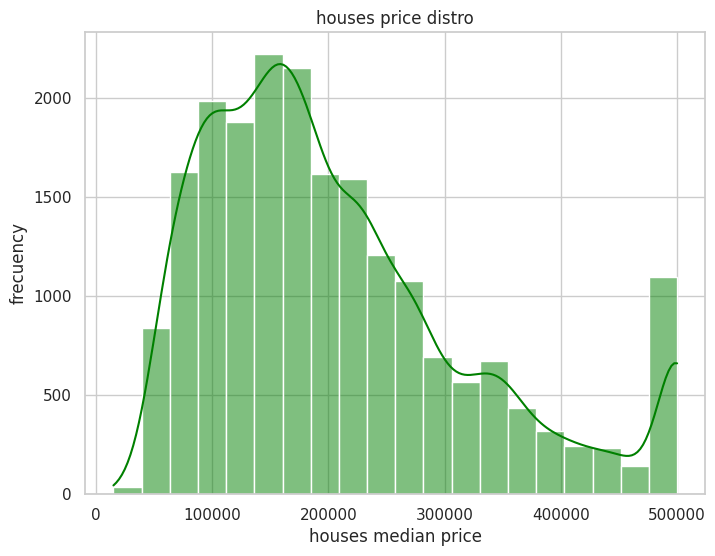

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(housing_data['median_house_value'], bins=20, kde=True, color='green')
plt.title('houses price distro')
plt.xlabel('houses median price')
plt.ylabel('frecuency')
plt.show()



> distribution slightly right-skewed, this indicates most houses are priced below 300.000$

> a smaller number of houses fall in the higher price ranges

> the highest frecuency lies between 150.000$ and 200.000$

> the spike at 500.000$ could indicate a CLUSTER of luxury homes or some boundary effect in the data



---

# Relationships Between Variables

  > the *scatterplot* reveals a clear positive relationship between median income and house prices:

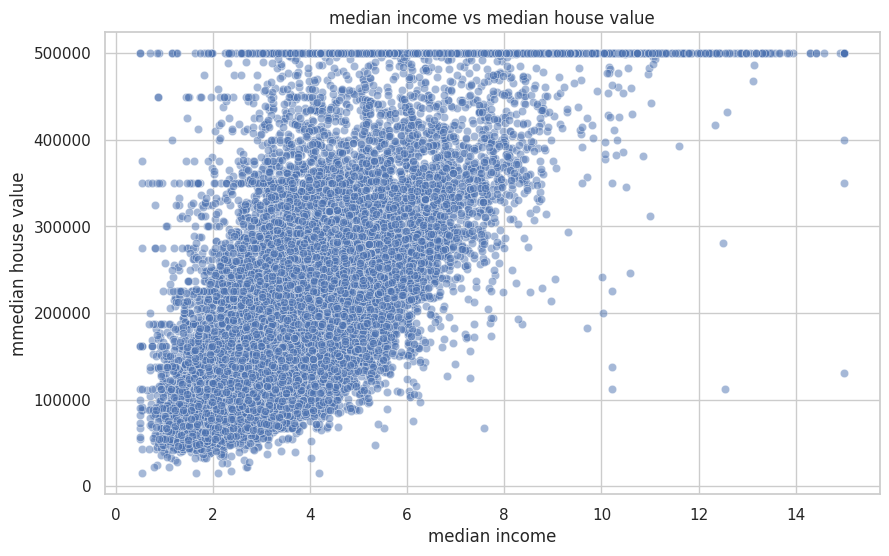

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=housing_data, alpha=0.5)
plt.title('median income vs median house value')
plt.xlabel('median income')
plt.ylabel('mmedian house value')
plt.show()



> clear positive correlation: as *median income* increases, the *median house value* tends to increase

> the density decreases as income increases, indicating fewer high-income areas

> while most data points follow the general trend, there are scattered *outliers* with high income but relatively low house values and viceversa


---

# Proximity to Ocean vs House Prices

> the *boxplot* highlights the relationship between proximity to the ocean and house prices



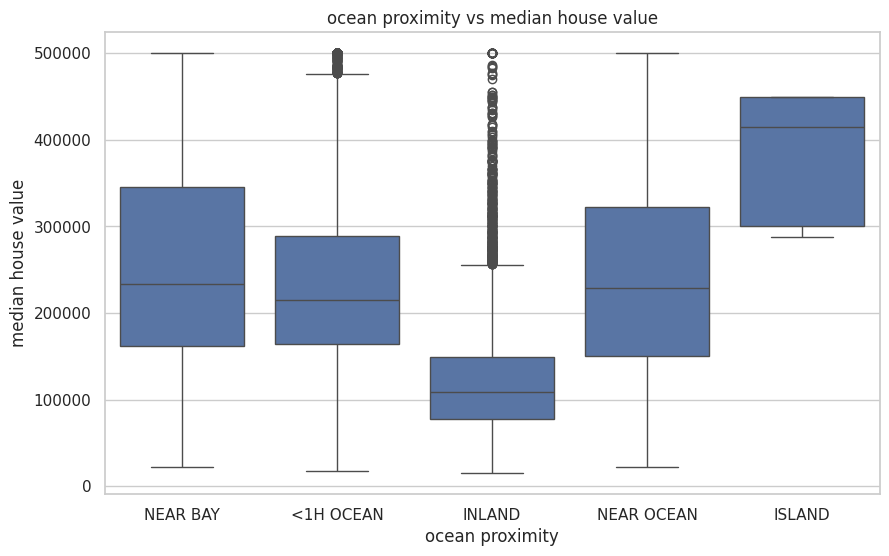

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing_data)
plt.title('ocean proximity vs median house value')
plt.xlabel('ocean proximity')
plt.ylabel('median house value')
plt.show()

**key observations**
- box plot

> median values:
- houses "NEAR OCEAN" and "ISLAND" have the highest median house values.
- houses "ISLAND" have the lowest median house values

> outliers:
- significant *outliers* are present for "INLAND", with values extending the 500.000$ cap

# Geographical Analysis

> this *scatterplot* maps house prices by geographic location.



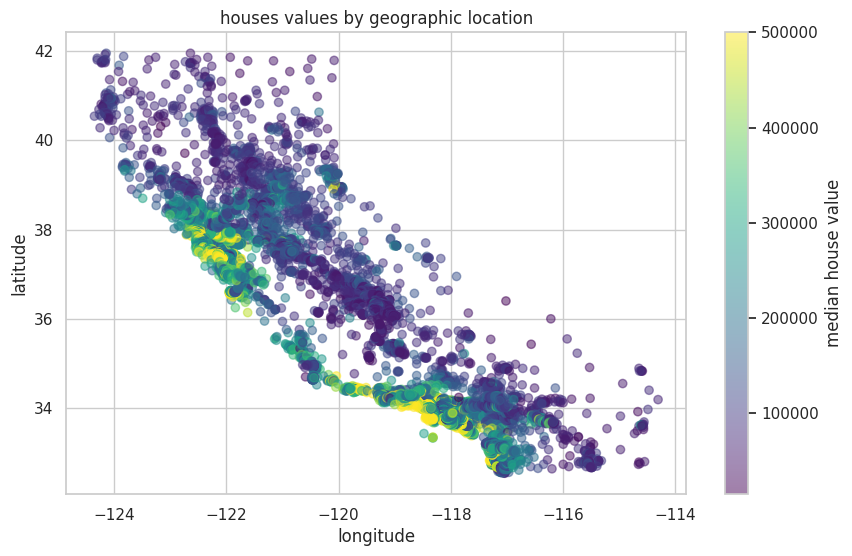

In [28]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(housing_data['longitude'], housing_data['latitude'], c=housing_data['median_house_value'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='median house value')
plt.title('houses values by geographic location')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('houses values by geographic location')
plt.show()

**key observations**

> coastal regions(closer to longitude -118 and latitude 34-ish) have the highest house values

> inland areas(closer to longitude -122 and latitude 36/38-ish) show consistently lower house prices

> this analysis supports the hypothesis that proximity to the ocean positively impacts house prices.

---

> Income and House Prices by Location

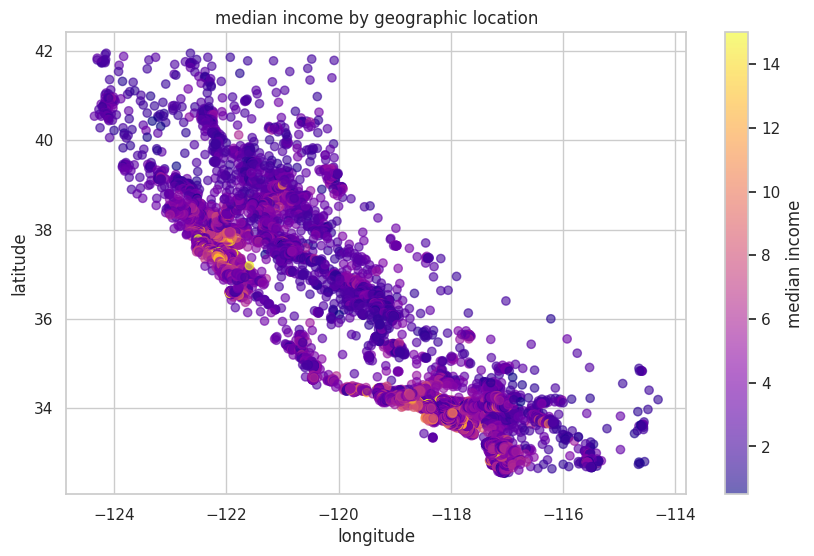

In [29]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(housing_data['longitude'], housing_data['latitude'], c=housing_data['median_income'], cmap='plasma', alpha=0.6)
plt.colorbar(scatter, label='median income')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('median income by geographic location')
plt.show()

**key observations**

> high income areas are concentrated along the coast

> inland areas exhibit significantly lower incomes, correlating with lower house values

---

> Total Rooms vs Households

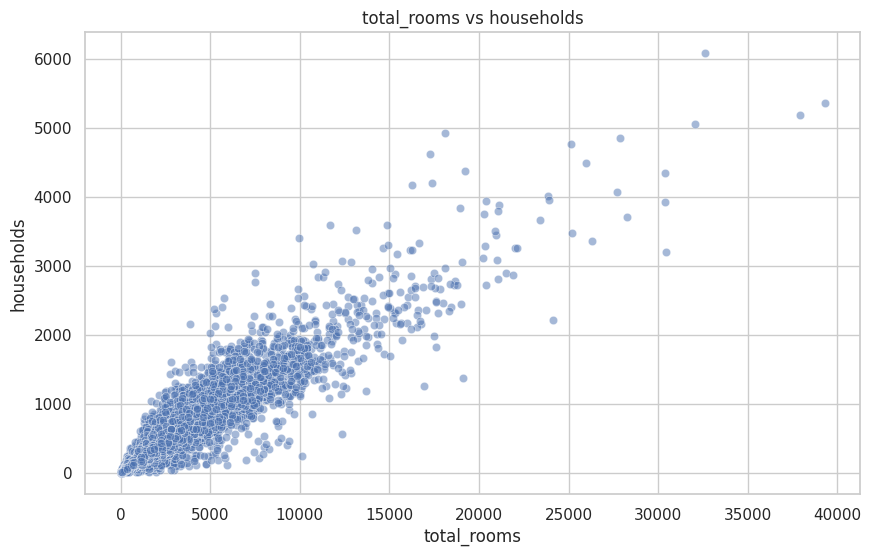

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_rooms', y='households', data=housing_data, alpha=0.5)
plt.title('total_rooms vs households')
plt.xlabel('total_rooms')
plt.ylabel('households')
plt.show()

**key observations**

> clear positive relation: more rooms generally correspond to more households

> some outliers indicate areas with disproportionately high room counts compared to households, suggesting potential luxury or commercial properties

---

> Population vs Households

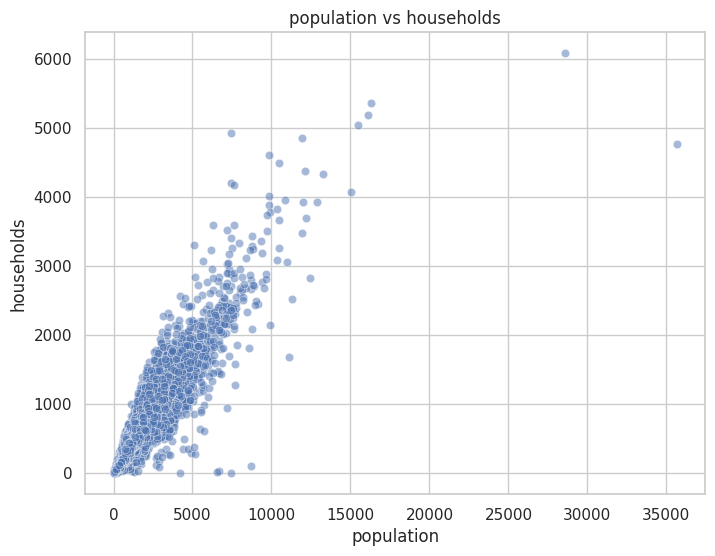

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='population', y='households', data=housing_data, alpha=0.5)
plt.xlabel('population')
plt.ylabel('households')
plt.title('population vs households')
plt.show()

**key observations**

> data points follow a proportional trend: larger populations correlate with more households

> some outliers suggests regions with high populations but relatively low household counts, may indicate overcrowded areas or large families per household.

---

> Correlation Heatmap: the heatmap reveals how different numerical features in the dataset correlate with each other

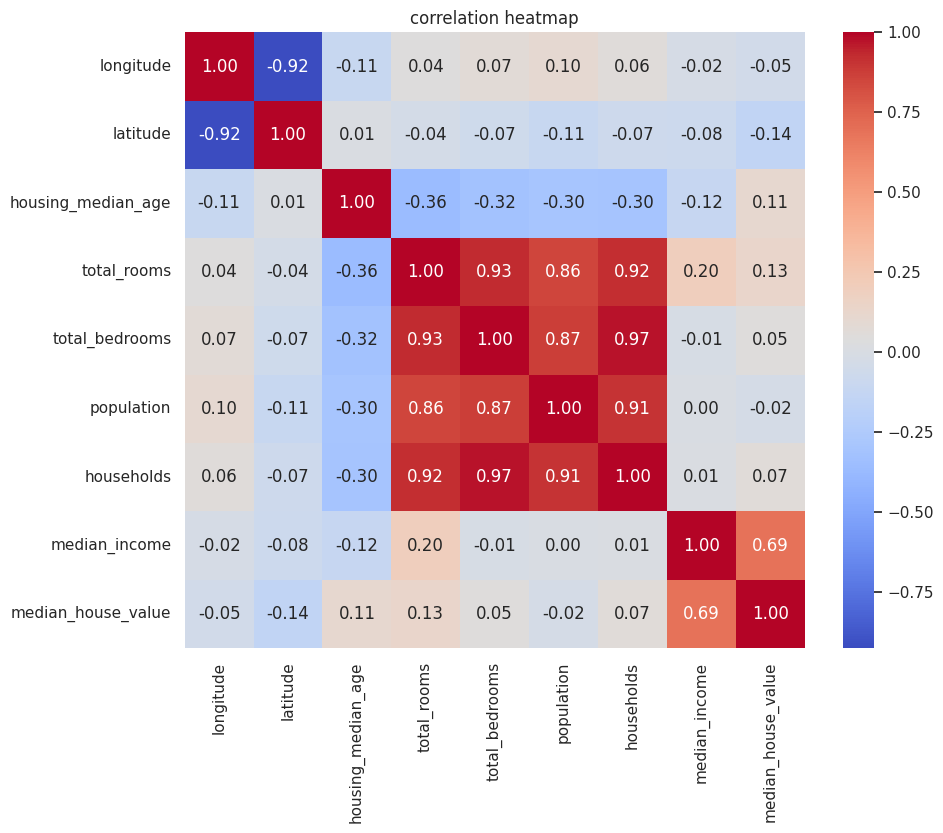

In [32]:
# select only numeric columns for the correlation matrix
numeric_data = housing_data.select_dtypes(include=['float64', 'int64'])

# compute the correlation matrix
correlation_matrix = numeric_data.corr()

# plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation heatmap')
plt.show()


** key observations**
- stron positive correlation:
> *median_income* and *median_house_value*. higher incomes lead to higher house prices

- mid positive correlation:
> *total_rooms* and *households*. areas with more room typically have more households

- weak correaltaions:
> *housing_median_age* and *median_house_value* show minimal influence on house prices

---

# Segment Analysis and Feature Engineering

> Segment Analysis: House Prices by Income Category

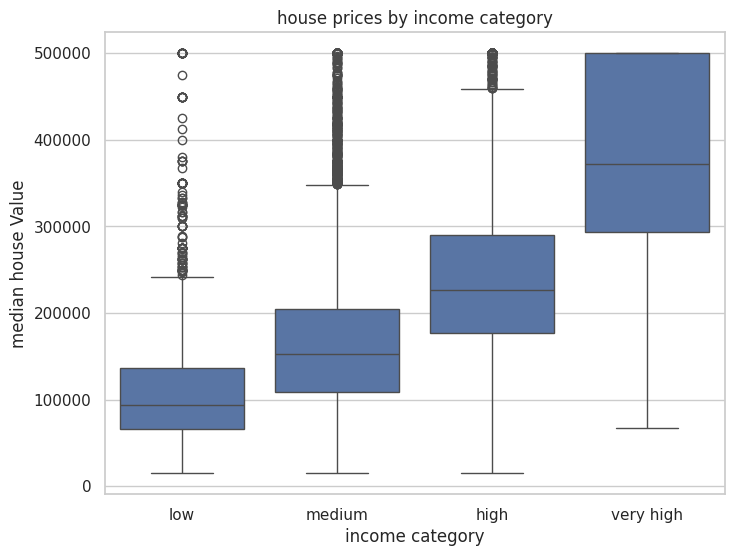

In [33]:
# define income categories
housing_data['income_category'] = pd.cut(housing_data['median_income'], bins=[0, 2, 4, 6, housing_data['median_income'].max()], labels=['low', 'medium', 'high', 'very high'])

# boxplot of house prices by income category
plt.figure(figsize=(8, 6))
sns.boxplot(x='income_category', y='median_house_value', data=housing_data)
plt.title('house prices by income category')
plt.xlabel('income category')
plt.ylabel('median house Value')
plt.show()


**key observations**

- clear trend:
> higher income categories are associated with significantly higher house prices

- low income category:
> median houses values are much lower, with fewer outliers reaching higher prices

- very high income category:
> wider spread of house prices, extremely high value properties

---

> Feature Engineering: Rooms per Household

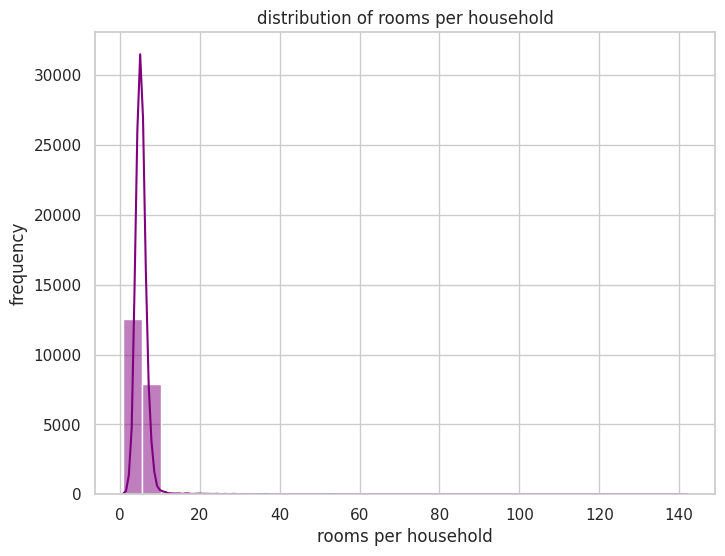

In [34]:
housing_data['rooms_per_household'] = housing_data['total_rooms'] / housing_data['households']

# Visualize the new feature
plt.figure(figsize=(8, 6))
sns.histplot(housing_data['rooms_per_household'], bins=30, kde=True, color='purple')
plt.title('distribution of rooms per household')
plt.xlabel('rooms per household')
plt.ylabel('frequency')
plt.show()


**key observations**
> most households have 2-5 rooms per households
> outliers suggest properties with unusually high room-to-household ratios, most likely representing luxusy homes or multy-family units

## conclusions

### key findings:
1. **drivers of house prices**:
   - the strongest predictor of house prices is **median income** (correlation ~0.68).
   - higher incomes are directly associated with higher house values.

2. **geographical patterns**:
   - **coastal regions** consistently have higher house prices compared to inland areas.
   - proximity to the ocean (*ocean_proximity*) plays a significant role in increasing house values.

3. **population and housing density**:
   - areas with higher populations and more households generally have more total rooms, as expected.
   - outliers in *rooms_per_household* and *population_per_household* may indicate luxury or overcrowded properties.

4. **engineered features**:
   - features like *rooms_per_household* and *bedrooms_per_room* can provide additional insights for predictive modeling.

### recommendations:
- focus on high-income areas near the coast for real estate investment opportunities.
- use engineered features and insights from this analysis for further predictive modeling of house prices.